# Analyzing Results

In [2]:
%pylab inline
from pandas import read_pickle, DataFrame
from scipy.stats import shapiro, kstest, wilcoxon
from pingouin import friedman
from itertools import combinations

def wilcoxon_paired(df: DataFrame, field: str):
    print(f'Wilcoxon Signed Rank Test - Paired for {field}')
    for m1, m2 in combinations(df['Method'].unique(), 2):
        D1 = df[df.Method == m1][field]
        D2 = df[df.Method == m2][field]
        if len(D1) != len(D2):
            min_count = min(len(D1), len(D2))
            D1 = D1.sample(min_count)
            D2 = D2.sample(min_count)
        results = wilcoxon(D1, D2)
        pval = results.pvalue
        comparison = 'equal' if pval > 0.05 else 'different'
        print(f'{m1} vs {m2} = {comparison} (pval={pval:.4f})')

Populating the interactive namespace from numpy and matplotlib


/home/idertator/Research/diff/venv/lib/python3.9/site-packages/outdated/utils.py:14: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.3.10, the latest is 0.3.11.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(
/home/idertator/Research/diff/venv/lib/python3.9/site-packages/outdated/utils.py:14: OutdatedPackageWarning: The package outdated is out of date. Your version is 0.2.0, the latest is 0.2.1.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(


## MSE Analysis 

,Filename,Status,Noise,Angle,Method,MSE
0,RegScSimul30_1000_allNoisesDC_0.1_Enfermo.mat,1,0.1,30,cd3,24.063546
1,RegScSimul30_1000_allNoisesDC_0.1_Enfermo.mat,1,0.1,30,cd5,48.276667
2,RegScSimul30_1000_allNoisesDC_0.1_Enfermo.mat,1,0.1,30,cd7,64.296122
3,RegScSimul30_1000_allNoisesDC_0.1_Enfermo.mat,1,0.1,30,cd9,74.444996
4,RegScSimul30_1000_allNoisesDC_0.1_Enfermo.mat,1,0.1,30,l5,1.014078
...,...,...,...,...,...,...
1915,RegScSimul20_1000_allNoisesDC_0.5_Enfermo.mat,1,0.5,20,sl11,16.321036
1916,RegScSimul20_1000_allNoisesDC_0.5_Enfermo.mat,1,0.5,20,snr5,97.138903
1917,RegScSimul20_1000_allNoisesDC_0.5_Enfermo.mat,1,0.5,20,snr7,28.045232
1918,RegScSimul20_1000_allNoisesDC_0.5_Enfermo.mat,1,0.5,20,snr9,14.925758


Shapiro-Wilk:  ShapiroResult(statistic=0.4336303472518921, pvalue=0.0)
Kolmogorov-Smirnov:  KstestResult(statistic=0.7377570922597518, pvalue=0.0)


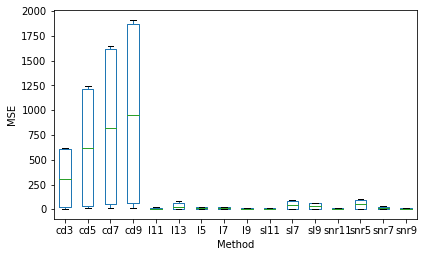

In [23]:
df = read_pickle('../data/mse.pkl.xz')
display(df)
boxplot = df.boxplot(
    'MSE', 
    by='Method',
    grid=False
)
boxplot.set_title(None)
boxplot.set_ylabel('MSE')
figure = boxplot.figure
figure.set_size_inches(6, 4)
figure.tight_layout()
figure.suptitle(None)

print('Testing DATA Normality')
print('Shapiro-Wilk: ', shapiro(df['MSE']))
print('Kolmogorov-Smirnov: ', kstest(df['MSE'], 'norm'))

In [47]:
from os.path import join

FIGURES_DIR = '../article/figures/'

filename = join(FIGURES_DIR, 'mse_boxplot.eps')

figure.savefig(filename, format='eps')

## Exact saccades analysis

In [2]:
df = read_pickle('../data/exact_saccades.pkl.xz')

print('Minimal Durations by Angle')
m20 = df[df.Angle==20]['Duration'].min()
m30 = df[df.Angle==30]['Duration'].min()
m60 = df[df.Angle==60]['Duration'].min()

print(f'20 degrees = {m20:.3f}')
print(f'30 degrees = {m30:.3f}')
print(f'60 degrees = {m60:.3f}')

Minimal Durations by Angle
20 degrees = 0.090
30 degrees = 0.115
60 degrees = 0.175


## Detected Saccades Analysis

,Filename,Status,Noise,Angle,Method,DetectedSaccades
0,RegScSimul60_1000_allNoisesDC_0.5_Enfermo.mat,1,0.5,60,l5,3
1,RegScSimul60_1000_allNoisesDC_0.5_Enfermo.mat,1,0.5,60,l7,8
2,RegScSimul60_1000_allNoisesDC_0.5_Enfermo.mat,1,0.5,60,l9,3
3,RegScSimul60_1000_allNoisesDC_0.5_Enfermo.mat,1,0.5,60,l11,1
4,RegScSimul60_1000_allNoisesDC_0.5_Enfermo.mat,1,0.5,60,l13,0
...,...,...,...,...,...,...
1435,RegScSimul20_1000_allNoisesDC_0.1_Enfermo.mat,1,0.1,20,sl11,0
1436,RegScSimul20_1000_allNoisesDC_0.1_Enfermo.mat,1,0.1,20,snr5,9
1437,RegScSimul20_1000_allNoisesDC_0.1_Enfermo.mat,1,0.1,20,snr7,4
1438,RegScSimul20_1000_allNoisesDC_0.1_Enfermo.mat,1,0.1,20,snr9,2


Testing DATA Normality
Shapiro-Wilk:  ShapiroResult(statistic=0.543410062789917, pvalue=0.0)
Kolmogorov-Smirnov:  KstestResult(statistic=0.49583333333333335, pvalue=0.0)


,count,mean,std,min,25%,50%,75%,max
Method,,,,,,,,
l11,120.0,0.208333,0.592613,0.0,0.0,0.0,0.00,4.0
l13,120.0,0.358333,0.848091,0.0,0.0,0.0,0.00,5.0
snr11,120.0,0.416667,0.922030,0.0,0.0,0.0,0.00,5.0
sl11,120.0,0.533333,1.122223,0.0,0.0,0.0,1.00,5.0
snr9,120.0,0.700000,1.233973,0.0,0.0,0.0,1.00,6.0
l9,120.0,0.750000,1.573147,0.0,0.0,0.0,0.25,7.0
l5,120.0,1.291667,2.186267,0.0,0.0,0.0,2.00,9.0
l7,120.0,1.825000,3.411948,0.0,0.0,0.0,2.00,14.0
snr7,120.0,1.883333,3.068362,0.0,0.0,0.0,3.00,16.0


,Source,W,ddof1,Q,p-unc
Friedman,Method,0.64946,11,85.728745,1.139542e-13


,Source,W,ddof1,ddof2,F,p-unc
Friedman,Method,0.64946,10.833333,119.166667,20.380173,2.125545e-22


Wilcoxon Signed Rank Test - Paired for AbsDetectedSaccades
l5 vs l7 = different (pval=0.0029)
l5 vs l9 = different (pval=0.0000)
l5 vs l11 = different (pval=0.0000)
l5 vs l13 = different (pval=0.0000)
l5 vs sl7 = different (pval=0.0000)
l5 vs sl9 = different (pval=0.0000)
l5 vs sl11 = different (pval=0.0000)
l5 vs snr5 = different (pval=0.0000)
l5 vs snr7 = different (pval=0.0002)
l5 vs snr9 = different (pval=0.0000)
l5 vs snr11 = different (pval=0.0000)
l7 vs l9 = different (pval=0.0000)
l7 vs l11 = different (pval=0.0000)
l7 vs l13 = different (pval=0.0000)
l7 vs sl7 = different (pval=0.0000)
l7 vs sl9 = different (pval=0.0000)
l7 vs sl11 = different (pval=0.0000)
l7 vs snr5 = different (pval=0.0000)
l7 vs snr7 = equal (pval=0.6154)
l7 vs snr9 = different (pval=0.0000)
l7 vs snr11 = different (pval=0.0000)
l9 vs l11 = different (pval=0.0000)
l9 vs l13 = different (pval=0.0015)
l9 vs sl7 = different (pval=0.0000)
l9 vs sl9 = different (pval=0.0000)
l9 vs sl11 = equal (pval=0.1692)
l9 

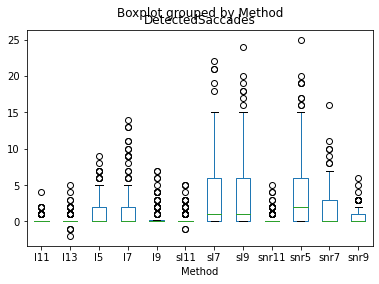

In [10]:
df = read_pickle('../data/detected_saccades.pkl.xz')
display(df)
boxplot = df.boxplot(
    'DetectedSaccades', 
    by='Method',
    grid=False
)

print('Testing DATA Normality')
print('Shapiro-Wilk: ', shapiro(df['DetectedSaccades']))
print('Kolmogorov-Smirnov: ', kstest(df['DetectedSaccades'], 'norm'))

df['AbsDetectedSaccades'] = abs(df['DetectedSaccades'])
display(df.groupby('Method').describe()['AbsDetectedSaccades'].sort_values(by='mean'))

display(friedman(df, dv='DetectedSaccades', within='Method', subject='Filename', method='chisq'))
display(friedman(df, dv='DetectedSaccades', within='Method', subject='Filename', method='f'))

wilcoxon_paired(df, 'AbsDetectedSaccades')

In [34]:
df[df.DetectedSaccades > 0].groupby('Filename').sum()
#df[df.DetectedSaccades != 0]

,Status,Noise,Angle,DetectedSaccades,AbsDetectedSaccades
Filename,,,,,
RegScSimul20_1000_allNoisesDC_0.5_Enfermo.mat,1,0.5,20,1,1
RegScSimul30_1000_allNoisesDC_0.5_Enfermo.mat,2,1.0,60,2,2


El fallo en la detección de sácadas solo ocurre en registros simulados de enfermos de 20 y 30 grados.
Principalmente los errores están en los de 20 grados.as_index

## Biomarkers Analysis
### Peak Velocity analysis

,Filename,Status,Noise,Angle,Method,PeakVelocity
0,RegScSimul60_1000_allNoisesDC_0.1_Sano.mat,0,0.1,60,l5,-4.457290
1,RegScSimul60_1000_allNoisesDC_0.1_Sano.mat,0,0.1,60,l5,-2.549786
2,RegScSimul60_1000_allNoisesDC_0.1_Sano.mat,0,0.1,60,l5,-3.667311
3,RegScSimul60_1000_allNoisesDC_0.1_Sano.mat,0,0.1,60,l5,-3.489048
4,RegScSimul60_1000_allNoisesDC_0.1_Sano.mat,0,0.1,60,l5,-4.353054
...,...,...,...,...,...,...
28795,RegScSimul20_1000_allNoisesDC_0.5_Sano.mat,0,0.5,20,snr11,-13.796104
28796,RegScSimul20_1000_allNoisesDC_0.5_Sano.mat,0,0.5,20,snr11,-16.323409
28797,RegScSimul20_1000_allNoisesDC_0.5_Sano.mat,0,0.5,20,snr11,-10.793023
28798,RegScSimul20_1000_allNoisesDC_0.5_Sano.mat,0,0.5,20,snr11,-16.564859


Testing DATA Normality
Shapiro-Wilk:  ShapiroResult(statistic=0.7298048734664917, pvalue=0.0)
Kolmogorov-Smirnov:  KstestResult(statistic=0.4860893075793399, pvalue=0.0)


/home/idertator/Research/diff/venv/lib/python3.9/site-packages/scipy/stats/morestats.py:1681: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


,Filename,Status,Noise,Angle,Method,PeakVelocity,AbsPeakVelocity
0,RegScSimul60_1000_allNoisesDC_0.1_Sano.mat,0,0.1,60,l5,-4.457290,4.457290
1,RegScSimul60_1000_allNoisesDC_0.1_Sano.mat,0,0.1,60,l5,-2.549786,2.549786
2,RegScSimul60_1000_allNoisesDC_0.1_Sano.mat,0,0.1,60,l5,-3.667311,3.667311
3,RegScSimul60_1000_allNoisesDC_0.1_Sano.mat,0,0.1,60,l5,-3.489048,3.489048
4,RegScSimul60_1000_allNoisesDC_0.1_Sano.mat,0,0.1,60,l5,-4.353054,4.353054
...,...,...,...,...,...,...,...
28795,RegScSimul20_1000_allNoisesDC_0.5_Sano.mat,0,0.5,20,snr11,-13.796104,13.796104
28796,RegScSimul20_1000_allNoisesDC_0.5_Sano.mat,0,0.5,20,snr11,-16.323409,16.323409
28797,RegScSimul20_1000_allNoisesDC_0.5_Sano.mat,0,0.5,20,snr11,-10.793023,10.793023
28798,RegScSimul20_1000_allNoisesDC_0.5_Sano.mat,0,0.5,20,snr11,-16.564859,16.564859


,Source,W,ddof1,Q,p-unc
Friedman,Method,0.648699,11,85.628205,1.192135e-13


,Source,W,ddof1,ddof2,F,p-unc
Friedman,Method,0.648699,10.833333,119.166667,20.312137,2.406815e-22


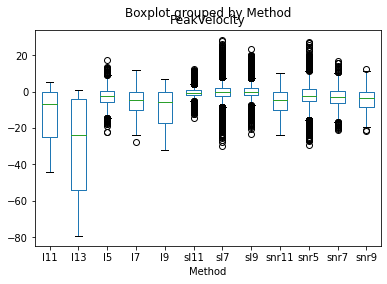

In [39]:
df = read_pickle('../data/peak_velocities.pkl.xz')
display(df)
boxplot = df.boxplot(
    'PeakVelocity', 
    by='Method',
    grid=False
)

print('Testing DATA Normality')
print('Shapiro-Wilk: ', shapiro(df['PeakVelocity']))
print('Kolmogorov-Smirnov: ', kstest(df['PeakVelocity'], 'norm'))

df['AbsPeakVelocity'] = abs(df['PeakVelocity'])

peak_velocities_df = df.groupby('Method').describe()['AbsPeakVelocity'].sort_values(by='mean')
display(df)

display(friedman(df, dv='PeakVelocity', within='Method', subject='Filename', method='chisq'))
display(friedman(df, dv='PeakVelocity', within='Method', subject='Filename', method='f'))

## Latencies analysis

,Filename,Status,Noise,Angle,Method,Latency
0,RegScSimul60_1000_allNoisesDC_0.1_Sano.mat,0,0.1,60,l5,-0.005
1,RegScSimul60_1000_allNoisesDC_0.1_Sano.mat,0,0.1,60,l5,0.000
2,RegScSimul60_1000_allNoisesDC_0.1_Sano.mat,0,0.1,60,l5,0.000
3,RegScSimul60_1000_allNoisesDC_0.1_Sano.mat,0,0.1,60,l5,-0.005
4,RegScSimul60_1000_allNoisesDC_0.1_Sano.mat,0,0.1,60,l5,0.000
...,...,...,...,...,...,...
28707,RegScSimul20_1000_allNoisesDC_0.5_Sano.mat,0,0.5,20,snr11,0.000
28708,RegScSimul20_1000_allNoisesDC_0.5_Sano.mat,0,0.5,20,snr11,0.000
28709,RegScSimul20_1000_allNoisesDC_0.5_Sano.mat,0,0.5,20,snr11,0.000
28710,RegScSimul20_1000_allNoisesDC_0.5_Sano.mat,0,0.5,20,snr11,-0.005


Testing DATA Normality
Shapiro-Wilk:  ShapiroResult(statistic=0.5159294009208679, pvalue=0.0)
Kolmogorov-Smirnov:  KstestResult(statistic=0.4932150314006883, pvalue=0.0)


/home/idertator/Research/diff/venv/lib/python3.9/site-packages/scipy/stats/morestats.py:1681: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


,count,mean,std,min,25%,50%,75%,max
Method,,,,,,,,
snr11,2400.0,0.004529,0.007955,0.0,0.000,0.005,0.005,0.120
l11,2400.0,0.004540,0.004207,0.0,0.000,0.005,0.005,0.065
l9,2400.0,0.004654,0.006423,0.0,0.000,0.005,0.005,0.095
sl11,2400.0,0.004919,0.010418,0.0,0.000,0.000,0.005,0.120
snr9,2397.0,0.005088,0.009784,0.0,0.000,0.005,0.005,0.120
l13,2399.0,0.006499,0.004754,0.0,0.005,0.005,0.010,0.065
l7,2398.0,0.006716,0.011609,0.0,0.000,0.005,0.005,0.115
l5,2394.0,0.006894,0.013778,0.0,0.000,0.005,0.005,0.150
snr7,2397.0,0.007553,0.015011,0.0,0.000,0.005,0.005,0.265


,Source,W,ddof1,Q,p-unc
Friedman,Method,0.792165,11,104.565724,2.217535e-17


,Source,W,ddof1,ddof2,F,p-unc
Friedman,Method,0.792165,10.833333,119.166667,41.926493,1.489612e-35


Wilcoxon Signed Rank Test - Paired for AbsLatency
l5 vs l7 = equal (pval=0.0967)
l5 vs l9 = different (pval=0.0023)
l5 vs l11 = equal (pval=0.0711)
l5 vs l13 = different (pval=0.0000)
l5 vs sl7 = different (pval=0.0000)
l5 vs sl9 = different (pval=0.0000)
l5 vs sl11 = different (pval=0.0000)
l5 vs snr5 = different (pval=0.0000)
l5 vs snr7 = equal (pval=0.1211)
l5 vs snr9 = different (pval=0.0000)
l5 vs snr11 = different (pval=0.0000)
l7 vs l9 = different (pval=0.0000)
l7 vs l11 = different (pval=0.0000)
l7 vs l13 = different (pval=0.0000)
l7 vs sl7 = different (pval=0.0000)
l7 vs sl9 = different (pval=0.0000)
l7 vs sl11 = different (pval=0.0000)
l7 vs snr5 = different (pval=0.0000)
l7 vs snr7 = equal (pval=0.8034)
l7 vs snr9 = different (pval=0.0000)
l7 vs snr11 = different (pval=0.0000)
l9 vs l11 = different (pval=0.0072)
l9 vs l13 = different (pval=0.0000)
l9 vs sl7 = different (pval=0.0000)
l9 vs sl9 = different (pval=0.0000)
l9 vs sl11 = different (pval=0.0000)
l9 vs snr5 = differe

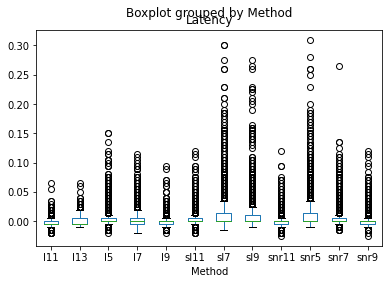

In [63]:
df = read_pickle('../data/latencies.pkl.xz')
display(df)
boxplot = df.boxplot(
    'Latency', 
    by='Method',
    grid=False
)

print('Testing DATA Normality')
print('Shapiro-Wilk: ', shapiro(df['Latency']))
print('Kolmogorov-Smirnov: ', kstest(df['Latency'], 'norm'))

df['AbsLatency'] = abs(df['Latency'])
latencies_df = df.groupby('Method').describe()['AbsLatency'].sort_values(by='mean')
display(latencies_df)

display(friedman(df, dv='Latency', within='Method', subject='Filename', method='chisq'))
display(friedman(df, dv='Latency', within='Method', subject='Filename', method='f'))

wilcoxon_paired(df, 'AbsLatency')

## Duration analysis

In [17]:
df[df.Method == 'l11']['Duration'].values

array([0.005, 0.005, 0.01 , ..., 0.01 , 0.015, 0.01 ])

,Filename,Status,Noise,Angle,Method,Duration
0,RegScSimul60_1000_allNoisesDC_0.1_Sano.mat,0,0.1,60,l5,0.005
1,RegScSimul60_1000_allNoisesDC_0.1_Sano.mat,0,0.1,60,l5,0.000
2,RegScSimul60_1000_allNoisesDC_0.1_Sano.mat,0,0.1,60,l5,0.000
3,RegScSimul60_1000_allNoisesDC_0.1_Sano.mat,0,0.1,60,l5,0.010
4,RegScSimul60_1000_allNoisesDC_0.1_Sano.mat,0,0.1,60,l5,0.000
...,...,...,...,...,...,...
28707,RegScSimul20_1000_allNoisesDC_0.5_Sano.mat,0,0.5,20,snr11,0.000
28708,RegScSimul20_1000_allNoisesDC_0.5_Sano.mat,0,0.5,20,snr11,0.000
28709,RegScSimul20_1000_allNoisesDC_0.5_Sano.mat,0,0.5,20,snr11,0.000
28710,RegScSimul20_1000_allNoisesDC_0.5_Sano.mat,0,0.5,20,snr11,0.010


Testing DATA Normality
Shapiro-Wilk:  ShapiroResult(statistic=0.5436229109764099, pvalue=0.0)
Kolmogorov-Smirnov:  KstestResult(statistic=0.4910464842769682, pvalue=0.0)


/home/idertator/Research/diff/venv/lib/python3.9/site-packages/scipy/stats/morestats.py:1681: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


,count,mean,std,min,25%,50%,75%,max
Method,,,,,,,,
l11,2400.0,0.007852,0.006506,0.0,0.005,0.010,0.010,0.085
snr11,2400.0,0.008433,0.013491,0.0,0.000,0.005,0.010,0.175
l9,2400.0,0.008471,0.011450,0.0,0.005,0.005,0.010,0.160
sl11,2400.0,0.009760,0.018608,0.0,0.000,0.005,0.010,0.190
snr9,2397.0,0.009973,0.017532,0.0,0.000,0.005,0.010,0.185
l13,2399.0,0.012916,0.009412,0.0,0.010,0.010,0.015,0.120
l7,2398.0,0.014145,0.023508,0.0,0.000,0.005,0.015,0.260
l5,2394.0,0.014259,0.026587,0.0,0.000,0.005,0.010,0.305
snr7,2397.0,0.016149,0.029935,0.0,0.000,0.005,0.015,0.410


,Source,W,ddof1,Q,p-unc
Friedman,Method,0.794386,11,104.858974,1.938901e-17


,Source,W,ddof1,ddof2,F,p-unc
Friedman,Method,0.794386,10.833333,119.166667,42.498347,7.947712e-36


Wilcoxon Signed Rank Test - Paired for AbsDuration
l5 vs l7 = equal (pval=0.0785)
l5 vs l9 = different (pval=0.0001)
l5 vs l11 = different (pval=0.0036)
l5 vs l13 = different (pval=0.0000)
l5 vs sl7 = different (pval=0.0000)
l5 vs sl9 = different (pval=0.0000)
l5 vs sl11 = different (pval=0.0000)
l5 vs snr5 = different (pval=0.0000)
l5 vs snr7 = different (pval=0.0273)
l5 vs snr9 = different (pval=0.0000)
l5 vs snr11 = different (pval=0.0000)
l7 vs l9 = different (pval=0.0000)
l7 vs l11 = different (pval=0.0000)
l7 vs l13 = different (pval=0.0000)
l7 vs sl7 = different (pval=0.0000)
l7 vs sl9 = different (pval=0.0000)
l7 vs sl11 = different (pval=0.0000)
l7 vs snr5 = different (pval=0.0000)
l7 vs snr7 = equal (pval=0.6320)
l7 vs snr9 = different (pval=0.0000)
l7 vs snr11 = different (pval=0.0000)
l9 vs l11 = equal (pval=0.0800)
l9 vs l13 = different (pval=0.0000)
l9 vs sl7 = different (pval=0.0000)
l9 vs sl9 = different (pval=0.0000)
l9 vs sl11 = equal (pval=0.0511)
l9 vs snr5 = differ

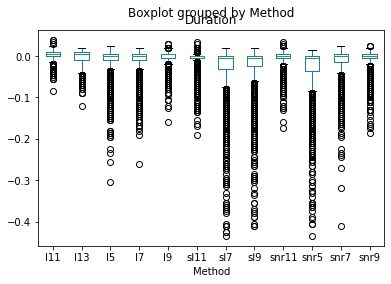

In [4]:
df = read_pickle('../data/durations.pkl.xz')
grouped_by = df.groupby('Method')
display(df)
boxplot = df.boxplot(
    'Duration', 
    by='Method',
    grid=False
)

print('Testing DATA Normality')
print('Shapiro-Wilk: ', shapiro(df['Duration']))
print('Kolmogorov-Smirnov: ', kstest(df['Duration'], 'norm'))

df['AbsDuration'] = abs(df['Duration'])
durations_df = df.groupby('Method').describe()['AbsDuration'].sort_values(by='mean')
display(durations_df)

display(friedman(df, dv='Duration', within='Method', subject='Filename', method='chisq'))
display(friedman(df, dv='Duration', within='Method', subject='Filename', method='f'))

wilcoxon_paired(df, 'AbsDuration')

In [79]:
pv_methods = peak_velocities_df.index.to_frame()['Method'].to_list()
pv_mean = peak_velocities_df['mean'].to_list()
pv_std = peak_velocities_df['std'].to_list()

lt_methods = latencies_df.index.to_frame()['Method'].to_list()
lt_mean = latencies_df['mean'].to_list()
lt_std = latencies_df['std'].to_list()

dr_methods = durations_df.index.to_frame()['Method'].to_list()
dr_mean = durations_df['mean'].to_list()
dr_std = durations_df['std'].to_list()

table = []
for pv, pvm, pvs, lt, ltm, lts, dr, drm, drs in zip(
    pv_methods,
    pv_mean,
    pv_std,
    lt_methods,
    lt_mean,
    lt_std,
    dr_methods,
    dr_mean,
    dr_std
):
    table.append([
        pv, f'{pvm:.4f} ± {pvs:.4f}', 
        lt, f'{ltm:.4f} ± {lts:.4f}', 
        dr, f'{drm:.4f} ± {drs:.4f}'
    ])

biomarkers_df = DataFrame(table, columns=[
    'Peak Velocity Method', 'Peak Velocity Error',
    'Latency Method', 'Latency Error',
    'Duration Method', 'Duration Error',
])
print('\n'.join(biomarkers_df.to_latex(escape=False).split('\n')))

\begin{tabular}{lllllll}
\toprule
{} & Peak Velocity Method & Peak Velocity Error & Latency Method &    Latency Error & Duration Method &   Duration Error \\
\midrule
0  &                 sl11 &     2.1375 ± 2.2142 &          snr11 &  0.0045 ± 0.0080 &             l11 &  0.0079 ± 0.0065 \\
1  &                  sl9 &     3.8759 ± 4.3384 &            l11 &  0.0045 ± 0.0042 &           snr11 &  0.0084 ± 0.0135 \\
2  &                   l5 &     4.1076 ± 3.4649 &             l9 &  0.0047 ± 0.0064 &              l9 &  0.0085 ± 0.0115 \\
3  &                  sl7 &     4.4216 ± 5.2121 &           sl11 &  0.0049 ± 0.0104 &            sl11 &  0.0098 ± 0.0186 \\
4  &                 snr7 &     4.5968 ± 3.9061 &           snr9 &  0.0051 ± 0.0098 &            snr9 &  0.0100 ± 0.0175 \\
5  &                 snr9 &     5.1840 ± 4.4540 &            l13 &  0.0065 ± 0.0048 &             l13 &  0.0129 ± 0.0094 \\
6  &                 snr5 &     5.7055 ± 5.3013 &             l7 &  0.0067 ± 0.0116 &    

El claro ganador de esta prueba es el **l11** debido a que muestra diferencias significativas con sus principales competidores.